# Final Project: Methods for Population Growth Projections

## Logistic Growth

Below is the standard logistic growth model, defined as $P(t) = \frac{K N_0 e^{\gamma t}}{K + N_0 (e^{\gamma t} - 1)}$

In [1]:
import pandas as pd
import numpy as np
from scipy import integrate
from scipy import optimize
import matplotlib.pyplot as plt

pop_change_df = pd.read_csv('data/pop_change.csv', index_col=0, header=0, skiprows=[], thousands=',')
pop_change_df.apply(pd.to_numeric)

,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,2000_POPULATION,2010_POPULATION
STATE_OR_REGION,,,,,,,,,,,
United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,281421906,308745538


In [2]:
country_total = pop_change_df.as_matrix()[0]

In [3]:
times = np.arange(1910,2020,10)

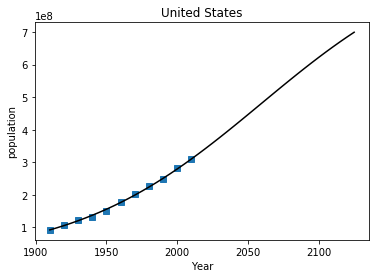

In [4]:
dN = (country_total[2:]-country_total[:-2])/(times[2:]-times[:-2])
P = dN / country_total[1:-1]
X = np.asarray([np.ones(9), country_total[1:-1]]).transpose()
Y = np.asarray(P)
alpha = np.linalg.lstsq(X,Y)[0]
gamma = alpha[0]
K = (-gamma) / alpha[1]
    
# compute the model estimate for the population development
t_estimate = np.arange(1910, 2130, 5)
N0=country_total[0]
t_model=t_estimate-1910
N=K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
K)*(np.exp(gamma*t_model)-1))
plt.figure()
plt.plot(times, country_total, 's')
plt.plot(t_estimate, N, 'k')
plt.xlabel('Year')
plt.ylabel('population')
plt.title('United States')
plt.show()

## Modified Lotka-Volterra

In [6]:
gdp_data = pd.read_csv('data/gdp_new.csv', index_col=0, header=0, sep=',', skiprows=[], thousands=',')
gdp_data.apply(pd.to_numeric)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
World,1.366670e+12,1.421780e+12,1.526940e+12,1.643740e+12,1.800780e+12,1.961770e+12,2.128440e+12,2.264580e+12,2.443210e+12,2.690780e+12,...,5.785850e+13,6.346140e+13,6.016790e+13,6.595460e+13,7.328040e+13,7.489050e+13,7.699300e+13,7.909090e+13,7.478190e+13,7.587170e+13
United States,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,1.019900e+12,...,1.447760e+13,1.471860e+13,1.441870e+13,1.496440e+13,1.551790e+13,1.615530e+13,1.669150e+13,1.742760e+13,1.812070e+13,1.862450e+13
United Kingdom,7.232805e+10,7.669436e+10,8.060194e+10,8.544377e+10,9.338760e+10,1.005960e+11,1.070910e+11,1.111850e+11,1.047030e+11,1.126770e+11,...,3.074360e+12,2.890560e+12,2.382830e+12,2.441170e+12,2.619700e+12,2.662090e+12,2.739820e+12,3.022830e+12,2.885570e+12,2.650850e+12


In [7]:
pop_data = pd.read_csv('data/pop_data.csv', index_col=0, header=0, sep=',', skiprows=[], thousands=',')
pop_data.apply(pd.to_numeric)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
World,3032160395,3073368588,3126509808,3191786431,3257459749,3324545317,3394783656,3464689184,3535355320,3610178790,...,6683228246,6766302523,6849573246,6932880892,7014998805,7099548883,7185078354,7271228018,7357369754,7444027227
United States,180671000,183691000,186538000,189242000,191889000,194303000,196560000,198712000,200706000,202677000,...,301231207,304093966,306771529,309348193,311663358,313998379,316204908,318563456,320896618,323127513
United Kingdom,52400000,52800000,53250000,53650000,54000000,54348050,54648500,54943600,55211700,55441750,...,61322463,61806995,62276270,62766365,63258918,63700300,64128226,64613160,65128861,65595565


In [8]:
gdp_real_data = gdp_data.as_matrix()
pop_real_data = pop_data.as_matrix()

In [19]:
par_init = [0.003, 5.2, -55e-18, 0.031, -2e-22] # Initial values provided by report
par_est = [0.003, 5.2e-6, -55e-17, 0.031, -2e-22] # Adjustments based on hypothesis

# x0 = [1.15e9, 0.21e12]

def model(t, data, params):   
    a1, a3k1, a2, b1, b2 = params
    
    x0 = [data[0][0], data[1][0]]
    
    def dpdt(x, t):
        return (a1*x[0] + a3k1*x[1] + a2*x[0]*x[1])
    def dgdt(x, t):
        return b1*x[1] + b2*x[0]*x[1]
    def dxdt(x, t):
        return np.array([dpdt(x, t),  dgdt(x, t)])
    
    return integrate.odeint(dxdt, x0, t).T # Transpose to get population and GDP in separate arrays

def score(params, t, data):
    model_data = model(t, data, params)
    
    return (model_data[0] - data[0])**2 + (model_data[1] - data[1])**2

[41208193 53141220 65276623 65673318 67085568 70238339 69905528 70666136
 74823470 75574548 77639703 76876635 75974024 76627581 74869289 72906775
 72657853 73850479 75708263 76473828 78464885 81378965 82080479 81781007
 83295269 85775255 87887472 88812175 88945013 90344928 87385409 84265238
 85119225 83918094 85003191 82837748 82801778 81732146 80652545 79864151
 79658107 79190999 79369461 79926138 80473991 81179213 81747596 83074277
 83270723 83307646 82117913 84550078 85529471 86149664 86141736 86657473]
[  2.09612089e-02  -2.59087427e-06   2.34812298e-16   2.47460861e-01
  -3.08722175e-11]


/Users/rossfreeman/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


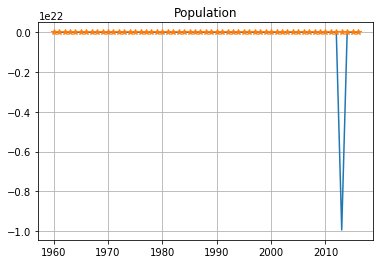

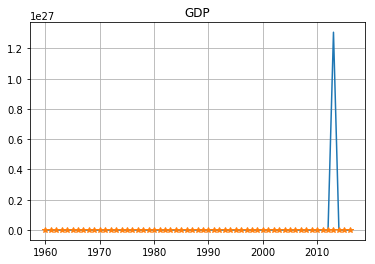

[3020000 2847000 2704000 2647000 2414000 2257000 2152000 1994000 1971000
 2375000 2609000 2235000 2013000 1945000 2119000 2062000 2204000 2346000
 2470000 2170000 2241000 2198000 2128000 2033000 2099000 2209000 2156000
 2210000 2320000 2804000 3358000 3533000 3405000 3207000 3152000 3116000
 3263000 3197000 3186000 3122411 2806544 2656238 2482740 2697365 2711301
 2863313 2851295 2862759 2677563 2576664 2315165 2335021 2206529 2358548
 2333162 2230895]
[  1.06789232e-02   3.17578722e-07  -1.18777337e-15   1.90843024e-01
  -5.03553276e-10]


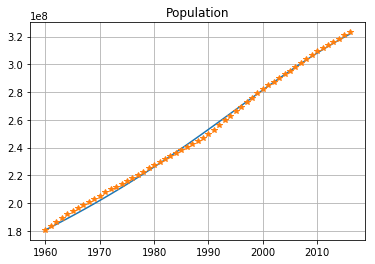

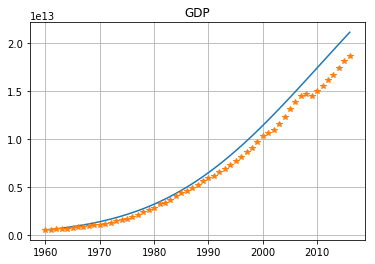

[400000 450000 400000 350000 348050 300450 295100 268100 230050 221500
 232973 189842 108462  35447  -4174 -13832 -18476   3012  50447  67265
  19613 -20188  19207  89224 128196 131128 120654 126277 148384 170875
 177311 155505 138212 147131 153285 147920 150004 170187 195325 210048
 227159 250806 277098 340328 413301 445614 475643 484532 469275 490095
 492553 441382 427926 484934 515701 466704]
[  2.98983175e-03  -9.65555952e-07   1.69427603e-14   8.46301522e-01
  -1.33976890e-08]


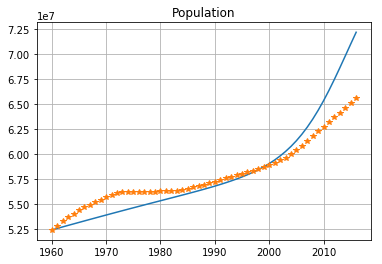

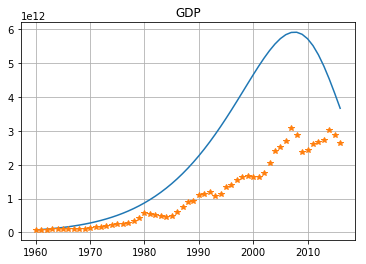

In [83]:
t = np.arange(1960, 2017, 1)

for (idx, country_gdp) in enumerate(gdp_real_data):
    country_pop = pop_real_data[idx]
    data = np.asarray([country_pop, country_gdp])
    
    p = country_pop[:-1]
    g = country_gdp[:-1]
    pg = p * g
    
    Y_pop = np.asarray([t - s for s, t in zip(country_pop, country_pop[1:])]) # Determine dp/dt vals
    X_pop = np.asarray([p, g, pg]).T
    
    print(Y_pop)
    
    Y_gdp = np.asarray([t - s for s, t in zip(country_gdp, country_gdp[1:])]) # Determine dg/dt vals
    X_gdp = np.asarray([g, pg]).T
    
    result_pop = np.linalg.lstsq(X_pop,Y_pop)
    result_gdp = np.linalg.lstsq(X_gdp,Y_gdp)
    result = np.append(result_pop[0], result_gdp[0])
    print(result)
    
    t_plot = np.arange(1960, 2017, 1)
    
    plt.figure()
    plt.title("Population")
    plt.grid()
    plt.plot(t_plot, model(t_plot, data, result)[0])
    plt.plot(np.arange(1960, 2017, 1), country_pop, '*')
    plt.show()
    
    plt.figure()
    plt.grid()
    plt.title("GDP")
    plt.plot(t_plot, model(t_plot, data, result)[1])
    # plt.plot(np.arange(1960, 2017, 1), res.T[1][110:-133])
    plt.plot(np.arange(1960, 2017, 1), country_gdp, '*')
    plt.plot()
    plt.show()

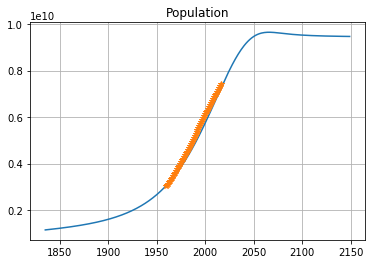

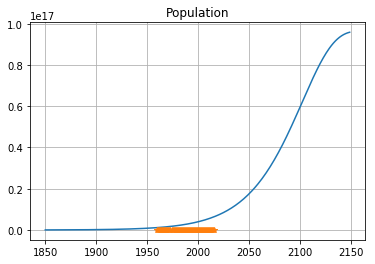

In [63]:
t = np.arange(1835, 2150, 1)

x0 = [[1.15e9], [0.21e12]]

plt.figure()
plt.title("Population")
plt.grid()
plt.plot(t, model(t, x0, par_est)[0])
plt.plot(np.arange(1960, 2017, 1), pop_real_data[0], '*')
plt.show()

t = np.arange(1850, 2150, 1)

plt.figure()
plt.title("Population")
plt.grid()
plt.plot(t, model(t, x0, par_init)[0])
plt.plot(np.arange(1960, 2017, 1), pop_real_data[0], '*')
plt.show()

IndexError: tuple index out of range